# <span style="color:#c934eb;">**Importing the Dependencies**</span>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rcParams
rcParams['figure.figsize'] = 9,9

from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

In [3]:
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import RandomizedSearchCV

In [4]:
import pickle

# <span style="color:#c934eb;">**Understanding the Dataset**</span>

In [6]:
# Loading the dataset into pandas data frame
df = pd.read_csv("taxi_fare.csv")

In [7]:
# print first 5 colums
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80


In [8]:
# checking the number of rows and columns
df.shape

(212345, 18)

In [9]:
# Check column names
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude', 'RatecodeID',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount'],
      dtype='object')

In [10]:
#Identify data types
df.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
pickup_longitude         float64
pickup_latitude          float64
RatecodeID                 int64
store_and_fwd_flag        object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [11]:
# Checking the null values in the data frame
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [12]:
# Check for duplicates
df.duplicated().sum()

0

In [13]:
# Get summary statistics
df.describe()

,VendorID,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000
mean,1.708338,1.766493,-73.112122,40.279405,1.034152,-73.144178,40.295648,1.324943,12.665588,0.048077,0.497662,1.809357,0.329049,0.299637,15.649355
std,0.454529,1.469647,7.936633,4.370714,0.494699,7.794599,4.293031,0.478255,10.875584,0.148103,0.037436,2.507419,2.028199,0.014094,13.592129
min,1.000000,0.000000,-121.933327,0.000000,1.000000,-121.933327,0.000000,1.000000,-52.000000,-0.500000,-0.500000,-2.700000,0.000000,-0.300000,-52.800000
25%,1.000000,1.000000,-73.990891,40.740292,1.000000,-73.990570,40.740089,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.300000
50%,2.000000,1.000000,-73.979469,40.755989,1.000000,-73.978691,40.755508,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.620000
75%,2.000000,2.000000,-73.963295,40.770283,1.000000,-73.964645,40.767475,2.000000,14.500000,0.000000,0.500000,2.360000,0.000000,0.300000,17.160000
max,2.000000,6.000000,0.000000,42.786934,99.000000,0.000000,42.786934,4.000000,819.500000,4.500000,0.500000,218.950000,661.080000,0.300000,832.800000


In [14]:
# Check unique values (df['col'].unique())

for col in df.select_dtypes(include=['object']).columns:
    print(f"Unique values in column '{col}':")
    print(df[col].unique())
    print("-" * 50)

Unique values in column 'tpep_pickup_datetime':
['2016-03-01 00:00:00' '2016-03-01 00:00:01' '2016-03-01 00:00:02' ...
 '2016-03-01 12:15:36' '2016-03-01 12:15:37' '2016-03-01 12:15:38']
--------------------------------------------------
Unique values in column 'tpep_dropoff_datetime':
['2016-03-01 00:07:55' '2016-03-01 00:11:06' '2016-03-01 00:31:06' ...
 '2016-03-01 12:37:29' '2016-03-01 12:38:53' '2016-03-01 12:38:22']
--------------------------------------------------
Unique values in column 'store_and_fwd_flag':
['N' 'Y']
--------------------------------------------------


# <span style="color:#c934eb;">**Data cleaning**</span>

### <span style="color:#fc9803;">**Convert str into date time format**</span>

In [17]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [18]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
pickup_longitude                float64
pickup_latitude                 float64
RatecodeID                        int64
store_and_fwd_flag               object
dropoff_longitude               float64
dropoff_latitude                float64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
dtype: object

In [19]:
df.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80


### <span style="color:#fc9803;">**Convert Coordinated Universal Time(UTC) into Eastern time zone(EDT)**</span>

In [21]:
# Step 1: Localize to UTC (if it's naive / timezone-unaware)
df['tpep_pickup_datetime'] = df['tpep_pickup_datetime'].dt.tz_localize('UTC')

# Step 2: Convert to US/Eastern (will automatically apply EDT/EST depending on date)
df['tpep_pickup_datetime'] = df['tpep_pickup_datetime'].dt.tz_convert('US/Eastern')

In [22]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-02-29 19:00:00-05:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-02-29 19:00:00-05:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-02-29 19:00:00-05:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-02-29 19:00:00-05:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-02-29 19:00:00-05:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80


### <span style="color:#fc9803;">**Create Distance in km Column**</span>

In [24]:
# Define the haversine formula
def haversine_distance(lat1, lon1, lat2, lon2):
    # Radius of the Earth in kilometers
    R = 6371.0  
    
    # Convert latitude and longitude from degrees to radians
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)

    # Haversine formula
    a = np.sin(delta_phi / 2.0) ** 2 + \
        np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2

    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    distance_km = R * c  # in kilometers
    return np.round(distance_km, 2)  # round to 2 decimal places

In [25]:
df['distance_km'] = haversine_distance(
    df['pickup_latitude'],
    df['pickup_longitude'],
    df['dropoff_latitude'],
    df['dropoff_longitude']
)

In [26]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,distance_km
0,1,2016-02-29 19:00:00-05:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35,3.14
1,1,2016-02-29 19:00:00-05:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35,4.30
2,2,2016-02-29 19:00:00-05:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80,16.60
3,2,2016-02-29 19:00:00-05:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62,9.05
4,2,2016-02-29 19:00:00-05:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80,20.40


### <span style="color:#fc9803;">**Create pickup_day Column**</span>

In [28]:
df['pickup_day'] = df['tpep_pickup_datetime'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

In [29]:
df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek

<div align="left">
    
### <span style="color:#fc9803;">**📅 `dayofweek` to Weekday Mapping**</span>

| dayofweek | Day       |
|:----------|:----------|
| 0         | Monday    |
| 1         | Tuesday   |
| 2         | Wednesday |
| 3         | Thursday  |
| 4         | Friday    |
| 5         | Saturday  |
| 6         | Sunday    |

</div>

In [31]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,distance_km,pickup_day,day_of_week
0,1,2016-02-29 19:00:00-05:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,...,9.0,0.5,0.5,2.05,0.00,0.3,12.35,3.14,Weekday,0
1,1,2016-02-29 19:00:00-05:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,...,11.0,0.5,0.5,3.05,0.00,0.3,15.35,4.30,Weekday,0
2,2,2016-02-29 19:00:00-05:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,...,54.5,0.5,0.5,8.00,0.00,0.3,63.80,16.60,Weekday,0
3,2,2016-02-29 19:00:00-05:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,...,31.5,0.0,0.5,3.78,5.54,0.3,41.62,9.05,Weekday,0
4,2,2016-02-29 19:00:00-05:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,...,98.0,0.0,0.0,0.00,15.50,0.3,113.80,20.40,Weekday,0


### <span style="color:#fc9803;">**label encoding for pickup_day column**</span>
##### <span style="color:#0eb514;">**Weekday --> 0**</span>
##### <span style="color:#0eb514;">**Weekend --> 1**</span>

In [33]:
df['pickup_day'] = df['pickup_day'].apply(lambda x: 1 if x == 'Weekday' else 0)

In [34]:
df.sample(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,distance_km,pickup_day,day_of_week
85387,1,2016-02-29 22:14:04-05:00,2016-03-01 03:23:24,1,-74.006699,40.744251,1,N,-73.972252,40.747303,...,10.0,0.5,0.5,0.00,0.0,0.3,11.30,2.92,1,0
44691,2,2016-03-10 06:19:24-05:00,2016-03-10 11:32:47,1,-73.984550,40.724800,1,N,-73.971054,40.751999,...,11.0,0.0,0.5,0.00,0.0,0.3,11.80,3.23,1,3
124654,1,2016-03-01 02:52:57-05:00,2016-03-01 07:59:18,1,-73.982864,40.741871,1,N,-73.992470,40.742874,...,6.0,0.0,0.5,1.00,0.0,0.3,7.80,0.82,1,1
153818,2,2016-03-01 04:13:57-05:00,2016-03-01 09:29:13,3,-73.994072,40.766541,1,N,-73.975090,40.763660,...,10.5,0.0,0.5,2.26,0.0,0.3,13.56,1.63,1,1
18439,2,2016-03-10 03:44:37-05:00,2016-03-10 08:51:22,1,-73.994011,40.732731,1,N,-73.999496,40.721561,...,6.0,0.0,0.5,1.70,0.0,0.3,8.50,1.33,1,3


In [35]:
df['pickup_day'].value_counts()

pickup_day
1    212345
Name: count, dtype: int64

##### <span style="color:#0eb514;">something strange in pickup day column because we have only one values. to confirm the we need to check the dates</span>

In [37]:
df['pickup_dates'] = df['tpep_pickup_datetime'].dt.strftime('%Y-%m-%d')

In [38]:
df['pickup_dates'].value_counts()

pickup_dates
2016-03-01    112944
2016-03-10     81783
2016-02-29     17618
Name: count, dtype: int64

we have only 3 days vaule in our data. Everything is  weekday data. so, this pickup_day column won't be usefull for machine learning. so after extract all details from tpep_pickup_datetime, we can drop this tpep_pickup_datetime column

In [40]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,distance_km,pickup_day,day_of_week,pickup_dates
0,1,2016-02-29 19:00:00-05:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,...,0.5,0.5,2.05,0.00,0.3,12.35,3.14,1,0,2016-02-29
1,1,2016-02-29 19:00:00-05:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,...,0.5,0.5,3.05,0.00,0.3,15.35,4.30,1,0,2016-02-29
2,2,2016-02-29 19:00:00-05:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,...,0.5,0.5,8.00,0.00,0.3,63.80,16.60,1,0,2016-02-29
3,2,2016-02-29 19:00:00-05:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,...,0.0,0.5,3.78,5.54,0.3,41.62,9.05,1,0,2016-02-29
4,2,2016-02-29 19:00:00-05:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,...,0.0,0.0,0.00,15.50,0.3,113.80,20.40,1,0,2016-02-29


### <span style="color:#fc9803;">**am/pm: Extract AM/PM Values**</span>

In [42]:
df['am_pm'] = df['tpep_pickup_datetime'].dt.strftime('%p')

In [43]:
df.sample(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,distance_km,pickup_day,day_of_week,pickup_dates,am_pm
189172,1,2016-03-01 05:53:40-05:00,2016-03-01 10:57:42,1,-73.994064,40.751373,1,N,-73.991234,40.755707,...,0.5,1.30,0.0,0.3,6.60,0.54,1,1,2016-03-01,AM
9328,2,2016-03-10 02:58:05-05:00,2016-03-10 08:10:05,1,-73.963852,40.770905,1,N,-73.983185,40.766766,...,0.5,2.70,0.0,0.3,13.50,1.69,1,3,2016-03-10,AM
8836,2,2016-03-10 02:55:26-05:00,2016-03-10 08:07:57,1,-73.962898,40.775311,1,N,-73.974571,40.756596,...,0.5,2.16,0.0,0.3,12.96,2.30,1,3,2016-03-10,AM
75219,1,2016-02-29 19:57:44-05:00,2016-03-01 01:09:04,1,-73.972267,40.756962,1,N,-73.999374,40.740143,...,0.5,2.00,0.0,0.3,14.80,2.95,1,0,2016-02-29,PM
134247,1,2016-03-01 03:20:05-05:00,2016-03-01 08:45:13,1,-73.987946,40.779484,1,N,-73.954224,40.764221,...,0.5,0.00,0.0,0.3,17.80,3.31,1,1,2016-03-01,AM


### <span style="color:#fc9803;">**label encoding for am_pm column**</span>
##### <span style="color:#0eb514;">**AM --> 0**</span>
##### <span style="color:#0eb514;">**PM --> 1**</span>

In [45]:
df['am_pm'] = df['am_pm'].apply(lambda x: 0 if x == 'AM' else 1)

In [46]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,distance_km,pickup_day,day_of_week,pickup_dates,am_pm
0,1,2016-02-29 19:00:00-05:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,...,0.5,2.05,0.00,0.3,12.35,3.14,1,0,2016-02-29,1
1,1,2016-02-29 19:00:00-05:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,...,0.5,3.05,0.00,0.3,15.35,4.30,1,0,2016-02-29,1
2,2,2016-02-29 19:00:00-05:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,...,0.5,8.00,0.00,0.3,63.80,16.60,1,0,2016-02-29,1
3,2,2016-02-29 19:00:00-05:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,...,0.5,3.78,5.54,0.3,41.62,9.05,1,0,2016-02-29,1
4,2,2016-02-29 19:00:00-05:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,...,0.0,0.00,15.50,0.3,113.80,20.40,1,0,2016-02-29,1


### <span style="color:#fc9803;">**Creating hour and is_night column**</span>
#### <span style="color:#0eb514;">**I considering the night time as 10 PM (22:00) to 5 AM (05:00)**</span>

In [48]:
# Extract hour from datetime
df['hour'] = df['tpep_pickup_datetime'].dt.hour

# Set binary flag: 1 = night, 0 = not night
df['is_night'] = df['hour'].apply(lambda x: 1 if x <= 5 or x >= 22 else 0)

In [49]:
df.sample(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,...,tolls_amount,improvement_surcharge,total_amount,distance_km,pickup_day,day_of_week,pickup_dates,am_pm,hour,is_night
169683,1,2016-03-01 04:46:53-05:00,2016-03-01 10:01:02,1,0.000000,0.000000,1,N,-73.976784,40.743568,...,0.0,0.3,14.80,8665.28,1,1,2016-03-01,0,4,1
13244,2,2016-03-10 03:17:57-05:00,2016-03-10 08:33:51,1,-74.003929,40.748070,1,N,-73.972260,40.763931,...,0.0,0.3,13.30,3.20,1,3,2016-03-10,0,3,1
199877,1,2016-03-01 06:32:38-05:00,2016-03-01 11:46:57,1,-74.009705,40.706291,1,N,-74.001167,40.724220,...,0.0,0.3,13.55,2.12,1,1,2016-03-01,0,6,0
139194,2,2016-03-01 03:34:06-05:00,2016-03-01 08:37:03,1,-73.985863,40.743801,1,N,-73.979584,40.744377,...,0.0,0.3,5.76,0.53,1,1,2016-03-01,0,3,1
146682,1,2016-03-01 03:53:41-05:00,2016-03-01 09:03:13,1,-73.975060,40.787613,1,N,-73.961967,40.780743,...,0.0,0.3,9.95,1.34,1,1,2016-03-01,0,3,1


### <span style="color:#fc9803;">**Drop unnecessary columns**</span>

In [51]:
# drop longitude and latitude columns
df_1 = df.drop(['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'], axis='columns')

In [52]:
# drop tpep_dropoff_datetime column
df_1 = df_1.drop(['tpep_dropoff_datetime'], axis='columns')

In [53]:
# drop VendorID column
df_1 = df_1.drop(['VendorID'], axis='columns')

In [54]:
# drop store_and_fwd_flag column
df_1 = df_1.drop(['store_and_fwd_flag'], axis='columns')

In [55]:
df_1.RatecodeID.value_counts()

RatecodeID
1     207479
2       3873
5        459
3        441
4         88
99         4
6          1
Name: count, dtype: int64

#### <span style="color:#0eb514;">**RatecodeID is more biosed so i drop this column**</span>

In [57]:
# drop RatecodeID column
df_1 = df_1.drop(['RatecodeID'], axis='columns')

In [58]:
# drop unnecessary payment releated columns
df_1 = df_1.drop(['fare_amount', 'mta_tax', 'improvement_surcharge'], axis='columns')

In [59]:
# drop unnecessary datetime releated columns
df_1 = df_1.drop(['pickup_dates', 'pickup_day', 'tpep_pickup_datetime'], axis='columns')

In [60]:
df_1.sample(10)

,passenger_count,payment_type,extra,tip_amount,tolls_amount,total_amount,distance_km,day_of_week,am_pm,hour,is_night
47254,1,2,0.0,0.00,5.54,45.34,8.52,3,0,6,0
42694,1,1,0.0,1.26,0.00,7.56,0.92,3,0,6,0
166837,1,2,0.0,0.00,5.54,47.34,9.15,1,0,4,1
4864,1,2,0.0,0.00,5.54,17.34,3.86,3,0,2,1
208021,1,2,0.0,0.00,0.00,12.80,2.62,1,0,7,0
160504,3,1,0.0,4.86,0.00,29.16,6.36,3,0,9,0
81810,1,2,0.5,0.00,0.00,8.80,1.63,0,1,20,0
25938,1,1,0.0,2.58,0.00,12.88,1.17,3,0,4,1
13952,1,1,0.0,1.17,0.00,8.97,1.75,3,0,3,1
46708,1,1,0.0,2.56,0.00,15.36,2.29,3,0,6,0


### <span style="color:#fc9803;">**Correlation**</span>
##### <span style="color:#0eb514;">**1. Positive correlation**</span>
##### <span style="color:#0eb514;">**2. Negative correlation**</span>

In [62]:
correlation = df_1.corr()

In [63]:
print(correlation)

                 passenger_count  payment_type     extra  tip_amount  \
passenger_count         1.000000     -0.000369 -0.032630    0.002656   
payment_type           -0.000369      1.000000  0.058785   -0.490224   
extra                  -0.032630      0.058785  1.000000   -0.025568   
tip_amount              0.002656     -0.490224 -0.025568    1.000000   
tolls_amount            0.003396     -0.036838 -0.020560    0.359836   
total_amount            0.005430     -0.157255  0.006900    0.718677   
distance_km            -0.014362      0.019394  0.003920    0.006264   
day_of_week             0.137266     -0.023089 -0.459142    0.026183   
am_pm                  -0.029322      0.057694  0.884464   -0.006633   
hour                    0.001751      0.074697  0.748068    0.000498   
is_night               -0.037845     -0.061915 -0.205260   -0.008613   

                 tolls_amount  total_amount  distance_km  day_of_week  \
passenger_count      0.003396      0.005430    -0.014362     0

### <span style="color:#fc9803;">**Constructing the Heatmap to understand the correlation**</span>

<Axes: >

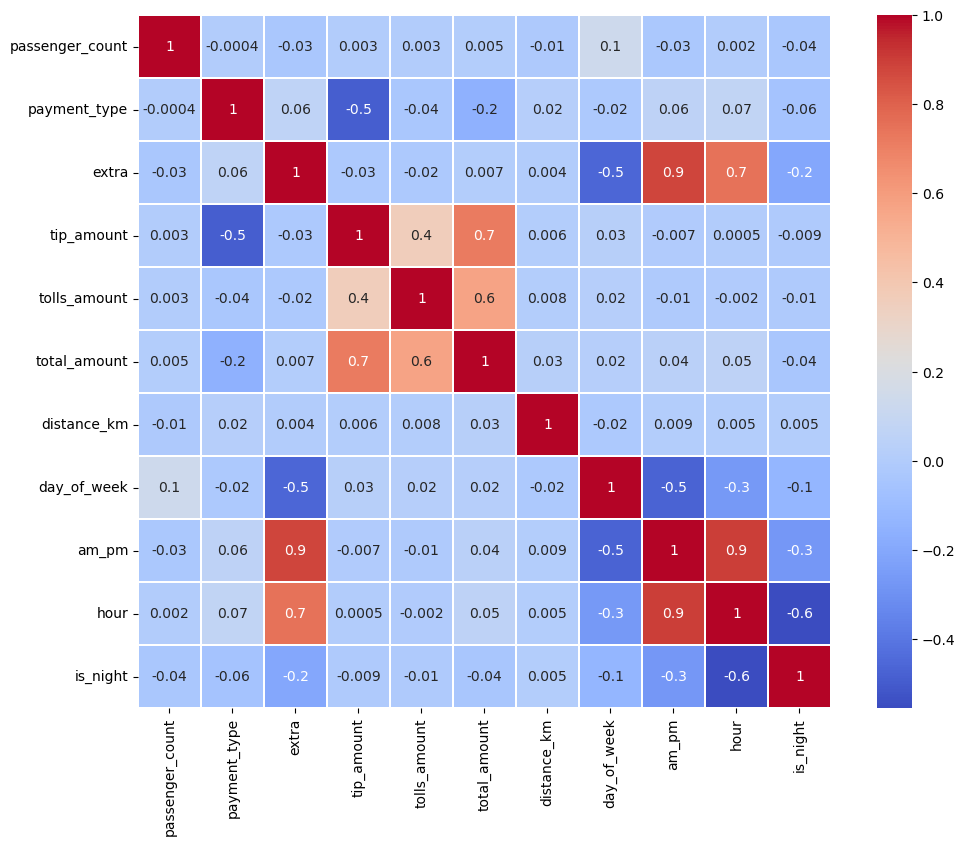

In [65]:
plt.figure(figsize = (12,9))
sns.heatmap(correlation, cbar=True, square=True, annot=True, annot_kws={"size":10}, fmt=".1g", cmap="coolwarm", 
            linewidths=0.1, linecolor='white')

### <span style="color:#fc9803;">**Skewness**</span>

In [67]:
skewness = df_1.skew()
skewness

passenger_count      1.886940
payment_type         0.923366
extra                2.858197
tip_amount           7.663467
tolls_amount       164.715241
total_amount         5.271134
distance_km         19.776430
day_of_week          0.242824
am_pm                3.023795
hour                 2.121815
is_night            -0.603459
dtype: float64

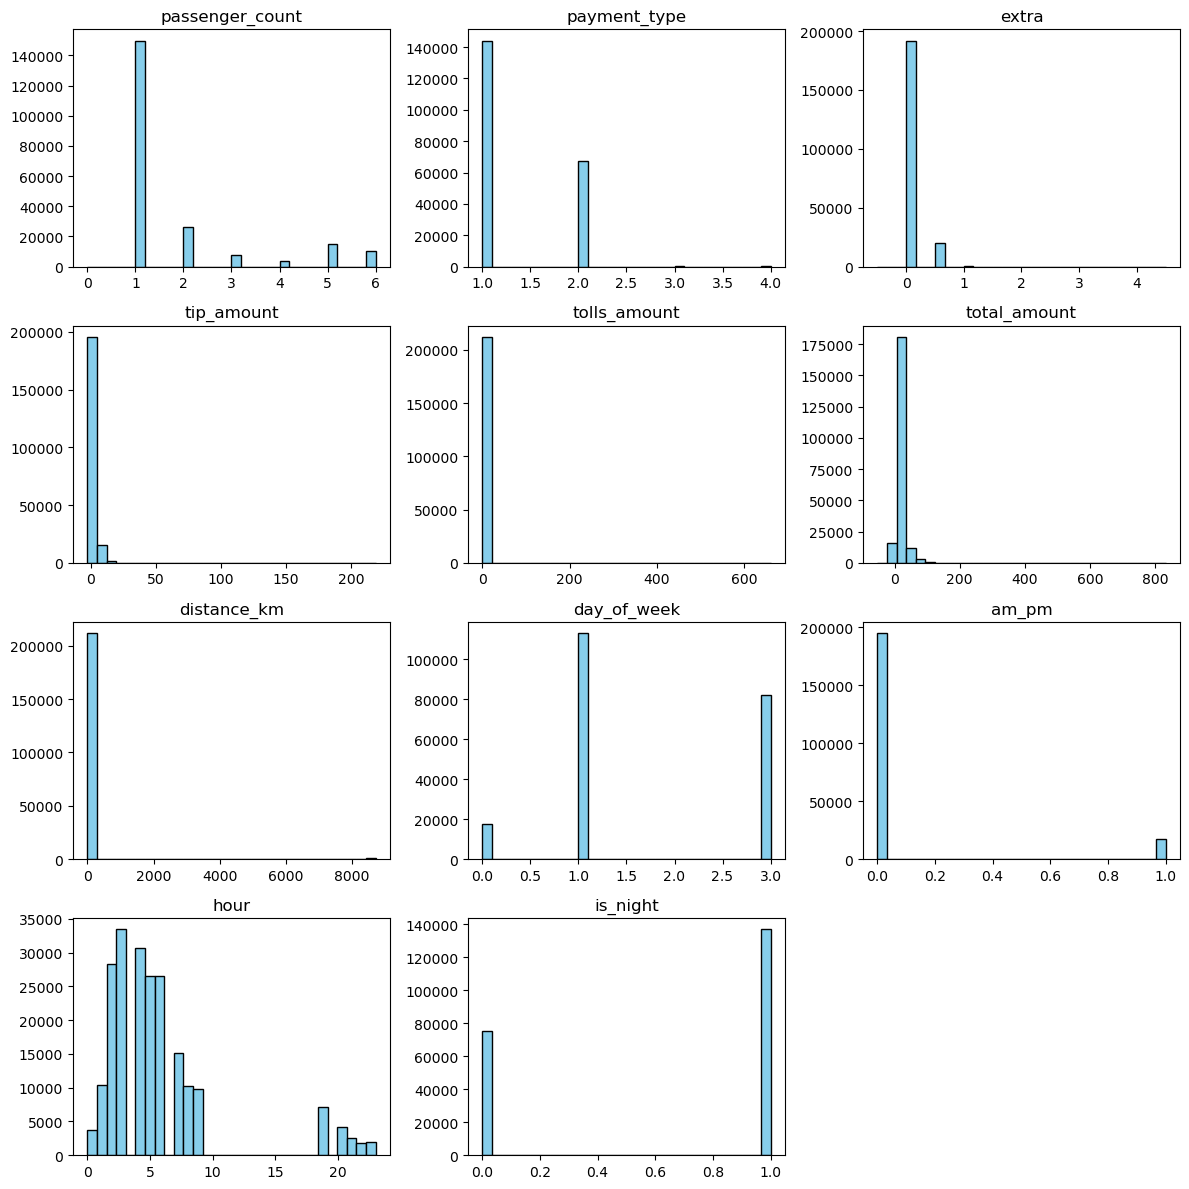

In [68]:
# Select numerical columns with high skewness (absolute skewness > 0.5)
skewed_cols = skewness.index

# Plot histograms before transformation
plt.figure(figsize=(12,12))
for i, col in enumerate(skewed_cols, 1):
    plt.subplot(4,3,i)
    plt.hist(df_1[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f"{col}")
plt.tight_layout()
plt.show()

# <span style="color:#c934eb;">**Outliers Treatment**</span>

In [70]:
numerical_cols = df_1.select_dtypes(exclude='object').columns
numerical_cols

Index(['passenger_count', 'payment_type', 'extra', 'tip_amount',
       'tolls_amount', 'total_amount', 'distance_km', 'day_of_week', 'am_pm',
       'hour', 'is_night'],
      dtype='object')

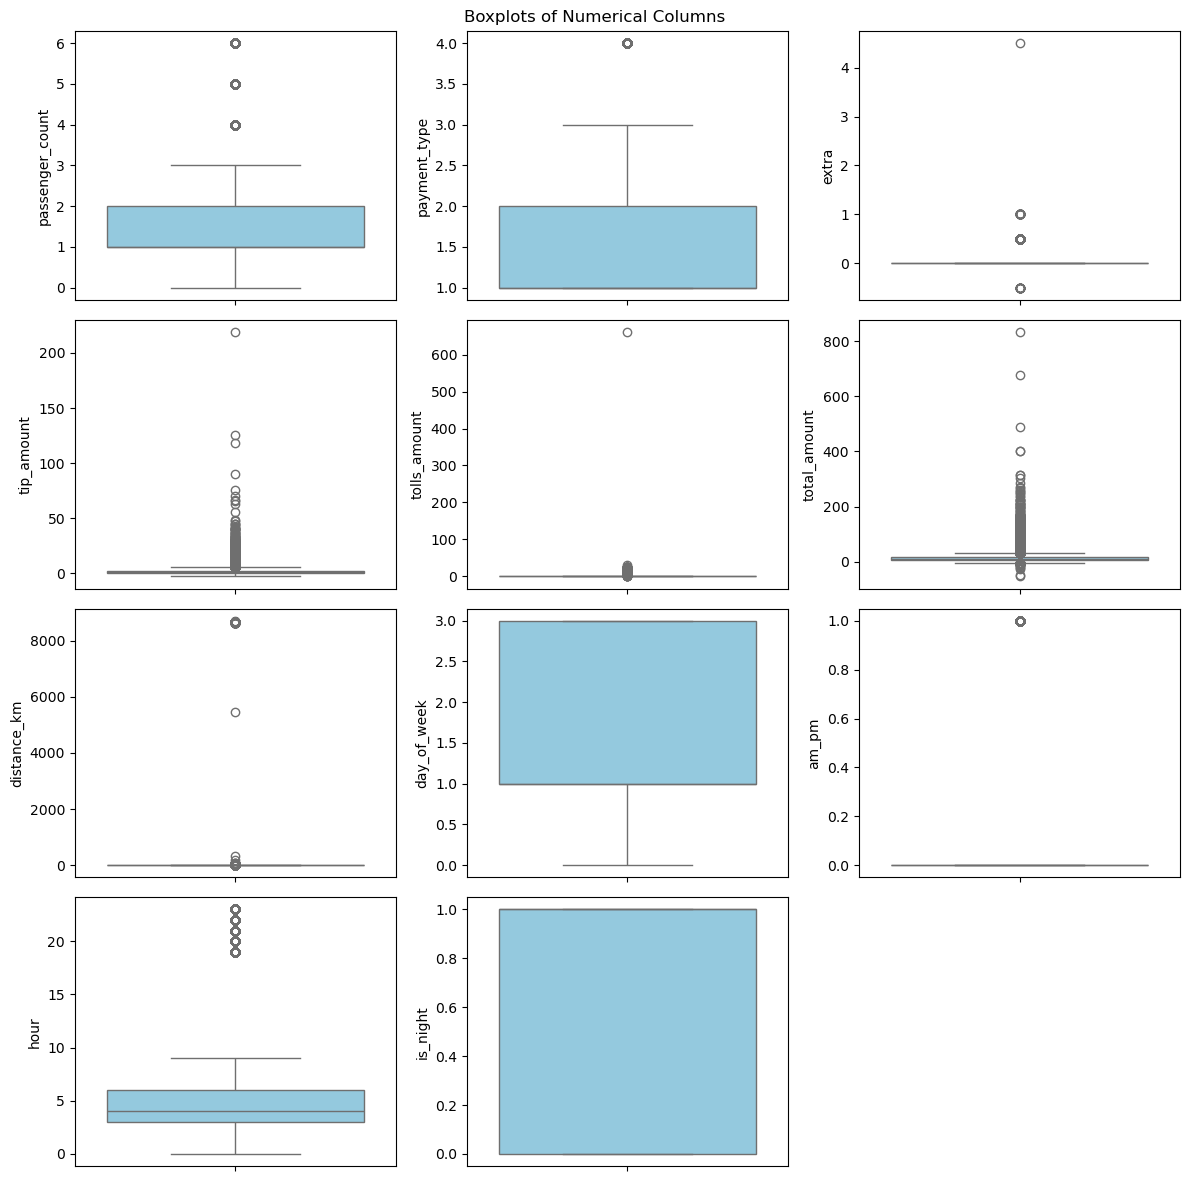

In [71]:
# Loop through numerical columns and create boxplots

plt.figure(figsize=(12, 12))
plt.suptitle('Boxplots of Numerical Columns')
for i in range(0, len(numerical_cols)):
    plt.subplot(4, 3, i+1)
    sns.boxplot(y=df_1[numerical_cols[i]],color='skyblue',)
    plt.tight_layout()

### <span style="color:#fc9803;">**distance_km**</span>

In [73]:
df_1[df_1['distance_km']>50]

,passenger_count,payment_type,extra,tip_amount,tolls_amount,total_amount,distance_km,day_of_week,am_pm,hour,is_night
6,6,2,0.5,0.00,0.00,24.30,8666.43,0,1,19,0
434,6,2,0.0,0.00,0.00,3.30,8665.95,3,0,2,1
1337,1,1,0.0,10.00,5.54,68.34,8664.81,3,0,2,1
1457,5,2,0.0,0.00,0.00,3.30,8659.52,3,0,2,1
5196,6,2,0.0,0.00,0.00,0.00,8659.51,3,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
211574,1,1,0.0,2.45,0.00,12.25,8662.88,1,0,7,0
211663,1,2,0.0,0.00,0.00,3.30,8665.70,1,0,7,0
211810,1,2,0.0,0.00,0.00,7.30,8664.42,1,0,7,0
211927,1,1,0.0,4.95,0.00,24.75,8665.72,1,0,7,0


#### <span style="color:#0eb514;">**we have 549 columns more than 50 km distance. it is outliers so we need to remove those values**</span>

### <span style="color:#fc9803;">**Before Removing Outliers on distance_km**</span>

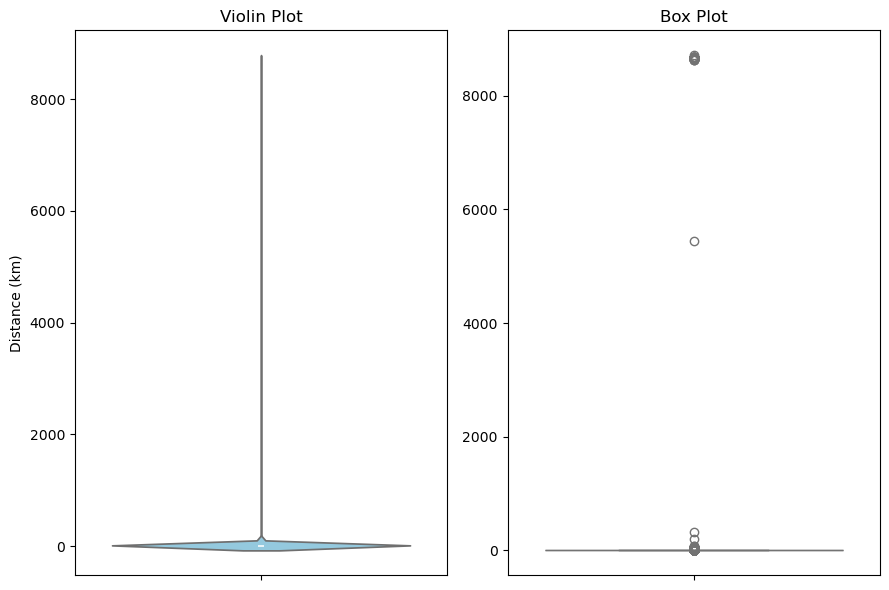

In [76]:
plt.figure(figsize=(9, 6))
plt.subplot(1, 2, 1)
sns.violinplot(y=df_1['distance_km'], color='skyblue')
plt.title('Violin Plot')
plt.ylabel('Distance (km)')

# Box plot on the right
plt.subplot(1, 2, 2)
sns.boxplot(y=df_1['distance_km'], color='lightgreen')
plt.title('Box Plot')
plt.ylabel('')  # Hide repeated label

plt.tight_layout()
plt.show()

### <span style="color:#fc9803;">**Outliers removal process on distance_km**</span>

In [78]:
Q1 = df_1['distance_km'].quantile(0.25)  # 25th percentile
Q3 = df_1['distance_km'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range

# Define lower and upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap values at lower and upper bound
df_1['distance_km'] = np.where(df_1['distance_km'] < lower_bound, lower_bound, df_1['distance_km'])
df_1['distance_km'] = np.where(df_1['distance_km'] > upper_bound, upper_bound, df_1['distance_km'])

### <span style="color:#fc9803;">**After Outliers removal process on distance_km**</span>

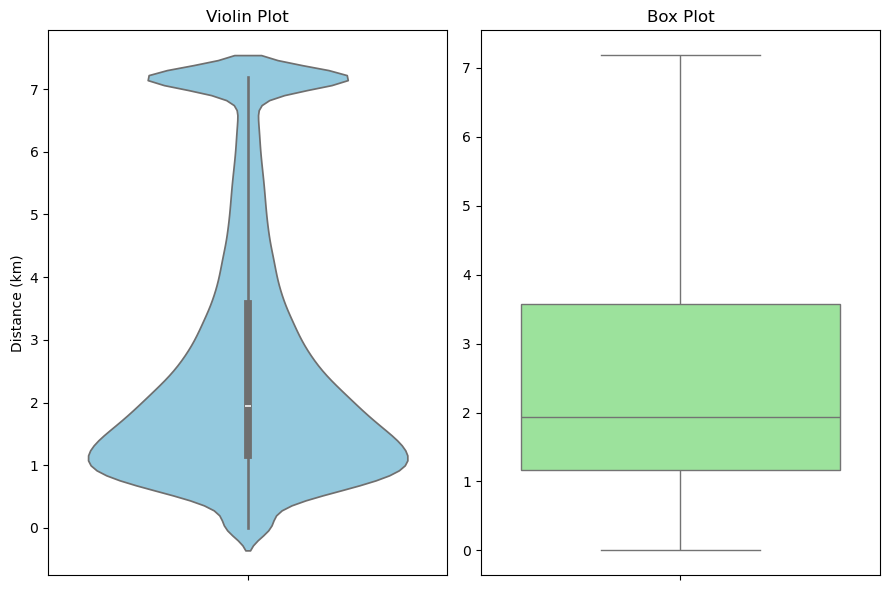

In [80]:
plt.figure(figsize=(9, 6))
plt.subplot(1, 2, 1)
sns.violinplot(y=df_1['distance_km'], color='skyblue')
plt.title('Violin Plot')
plt.ylabel('Distance (km)')

# Box plot on the right
plt.subplot(1, 2, 2)
sns.boxplot(y=df_1['distance_km'], color='lightgreen')
plt.title('Box Plot')
plt.ylabel('')  # Hide repeated label

plt.tight_layout()
plt.show()

### <span style="color:#fc9803;">**passenger_count**</span>

#### <span style="color:#0eb514;">**Drop Zero passenger_count columns because this is anomaly value**</span>

In [83]:
df_1['passenger_count'].value_counts()

passenger_count
1    149838
2     26371
5     14904
6     10328
3      7542
4      3353
0         9
Name: count, dtype: int64

In [84]:
df_1.drop(df_1[df_1['passenger_count'] < 1].index, inplace=True)

In [85]:
df_1['passenger_count'].value_counts()

passenger_count
1    149838
2     26371
5     14904
6     10328
3      7542
4      3353
Name: count, dtype: int64

### <span style="color:#fc9803;">**tip_amount, total_amount, tolls_amount, extra and payment_type**</span>

In [87]:
# tip_amount won't be less than zero. So, we need to remove the anomaly values
df_1[df_1['tip_amount']<0]

,passenger_count,payment_type,extra,tip_amount,tolls_amount,total_amount,distance_km,day_of_week,am_pm,hour,is_night
2231,1,3,0.0,-2.34,0.0,-10.14,1.36,3,0,2,1
7141,5,4,0.0,-0.66,0.0,-3.96,0.00,3,0,2,1
7495,5,4,0.0,-0.66,0.0,-3.96,0.08,3,0,2,1
60435,1,3,0.0,-2.70,0.0,-6.00,0.00,3,0,7,0


In [88]:
# total_amount won't be less than zero. So,  we need to remove the anomaly values
df_1[df_1['total_amount']<=0]

,passenger_count,payment_type,extra,tip_amount,tolls_amount,total_amount,distance_km,day_of_week,am_pm,hour,is_night
354,5,2,0.0,0.00,0.0,0.00,0.010,3,0,2,1
407,1,3,0.0,0.00,0.0,-6.30,0.740,3,0,2,1
1119,1,3,0.0,0.00,0.0,-3.30,7.185,3,0,2,1
1309,1,2,0.0,0.00,0.0,0.00,0.000,3,0,2,1
2231,1,3,0.0,-2.34,0.0,-10.14,1.360,3,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
203293,2,4,0.0,0.00,0.0,-3.30,0.020,1,0,6,0
204041,1,2,0.0,0.00,0.0,-3.80,0.110,1,0,6,0
208970,1,4,0.0,0.00,0.0,-6.30,0.540,1,0,7,0
209202,1,4,0.0,0.00,0.0,-5.30,0.580,1,0,7,0


In [89]:
# Drop tip_amonut and total_amount is less than 0. So,  we are going to drop the anomaly values
df_1.drop(df_1[df_1['tip_amount'] < 0].index, inplace=True)
df_1.drop(df_1[df_1['total_amount'] <= 0].index, inplace=True)

In [90]:
df_1['tolls_amount'].value_counts()

tolls_amount
0.00     200575
5.54      10896
12.50       163
10.50       114
2.54         64
          ...  
7.62          1
14.05         1
30.54         1
11.00         1
18.75         1
Name: count, Length: 109, dtype: int64

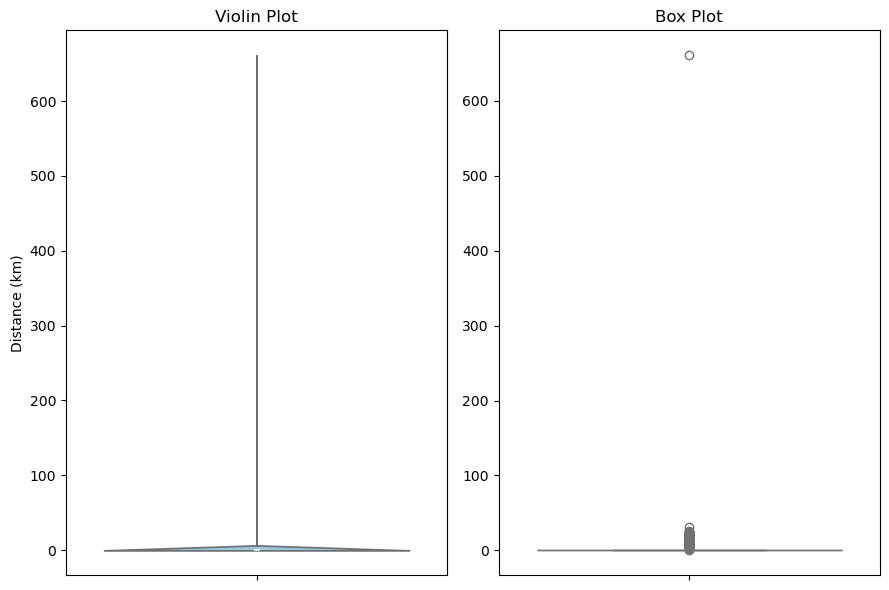

In [91]:
plt.figure(figsize=(9, 6))
plt.subplot(1, 2, 1)
sns.violinplot(y=df_1['tolls_amount'], color='skyblue')
plt.title('Violin Plot')
plt.ylabel('Distance (km)')

# Box plot on the right
plt.subplot(1, 2, 2)
sns.boxplot(y=df_1['tolls_amount'], color='lightgreen')
plt.title('Box Plot')
plt.ylabel('')  # Hide repeated label

plt.tight_layout()
plt.show()

In [92]:
df_1.drop(df_1[df_1['tolls_amount']>10].index, inplace=True)

removed more than $10 amount from tolls_amount

In [94]:
df_1.extra.value_counts()

extra
0.0    191266
0.5     20297
1.0        33
Name: count, dtype: int64

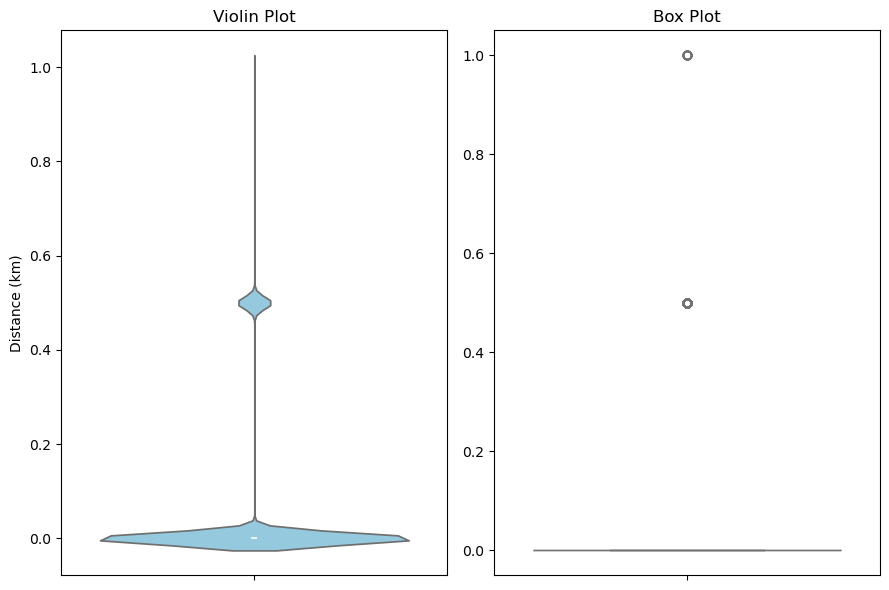

In [95]:
plt.figure(figsize=(9, 6))
plt.subplot(1, 2, 1)
sns.violinplot(y=df_1['extra'], color='skyblue')
plt.title('Violin Plot')
plt.ylabel('Distance (km)')

# Box plot on the right
plt.subplot(1, 2, 2)
sns.boxplot(y=df_1['extra'], color='lightgreen')
plt.title('Box Plot')
plt.ylabel('')  # Hide repeated label

plt.tight_layout()
plt.show()

In [96]:
df_1.payment_type.value_counts()

payment_type
1    143660
2     67417
3       383
4       136
Name: count, dtype: int64

In [97]:
# Now we need to remove the outliers from tip_amount and total_amount column
amount_columns = ['tip_amount','total_amount']

for col in amount_columns:

    Q1 = df_1[col].quantile(0.25)  # 25th percentile
    Q3 = df_1[col].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range

    # Define lower and upper bound
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values at lower and upper bound
    df_1[col] = np.where(df_1[col] < lower_bound, lower_bound, df_1[col])
    df_1[col] = np.where(df_1[col] > upper_bound, upper_bound, df_1[col])

### <span style="color:#fc9803;">**After Outlier Process On All Columns**</span>

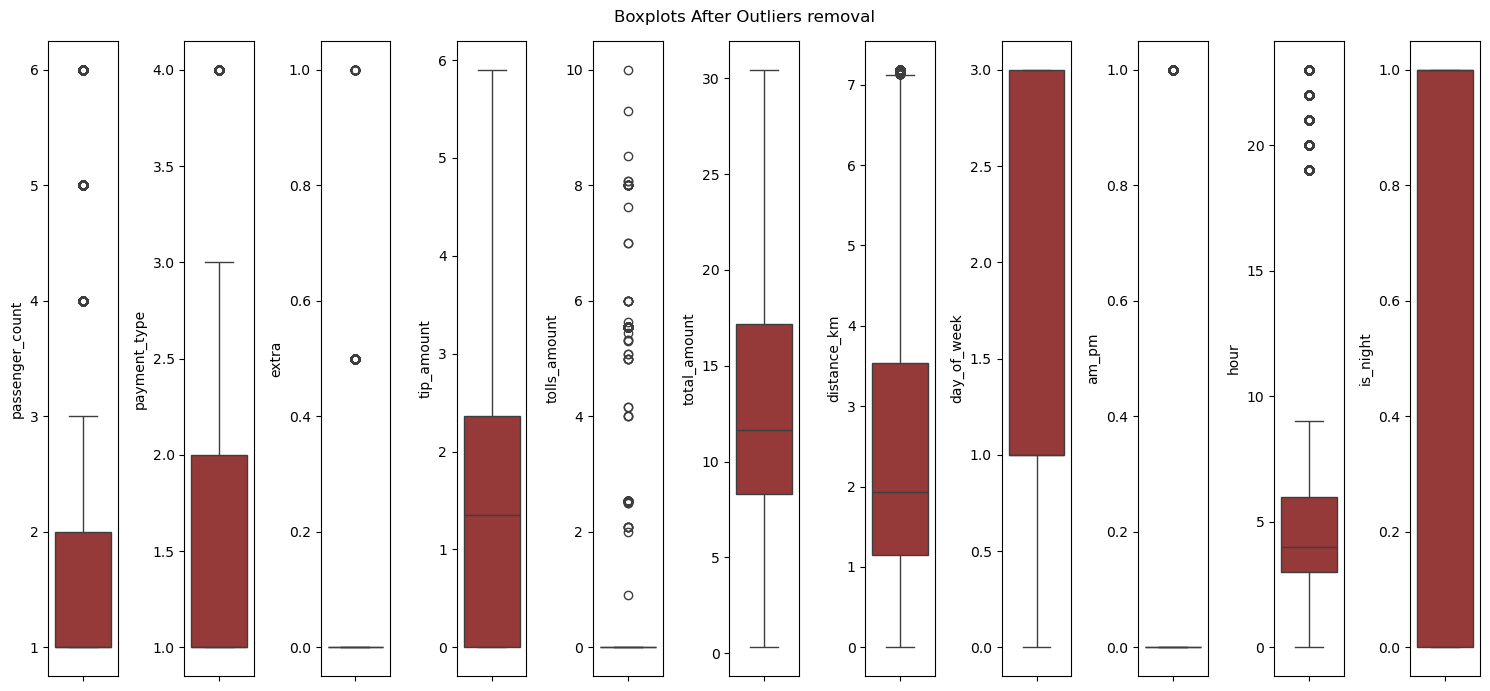

In [99]:
plt.figure(figsize=(15, 7))
plt.suptitle("Boxplots After Outliers removal")
for i in range(0, len(numerical_cols)):
    plt.subplot(1, 11, i+1)
    sns.boxplot(y=df_1[numerical_cols[i]],color='brown',)
    plt.tight_layout()

### <span style="color:#fc9803;">**AM_PM**</span>

In [101]:
df_1['am_pm'].value_counts()

am_pm
0    194068
1     17528
Name: count, dtype: int64

### <span style="color:#fc9803;">**Hour**</span>

In [103]:
df_1['hour'].value_counts()

hour
3     33356
4     30587
2     28198
5     26526
6     26407
7     15054
1     10302
8     10166
9      9806
19     7062
20     4129
0      3666
21     2587
23     1905
22     1845
Name: count, dtype: int64

### <span style="color:#fc9803;">**log transform for distance_km to avoid skewness**</span>

In [105]:
df_1['distance_km'] = np.log1p(df_1['distance_km'])

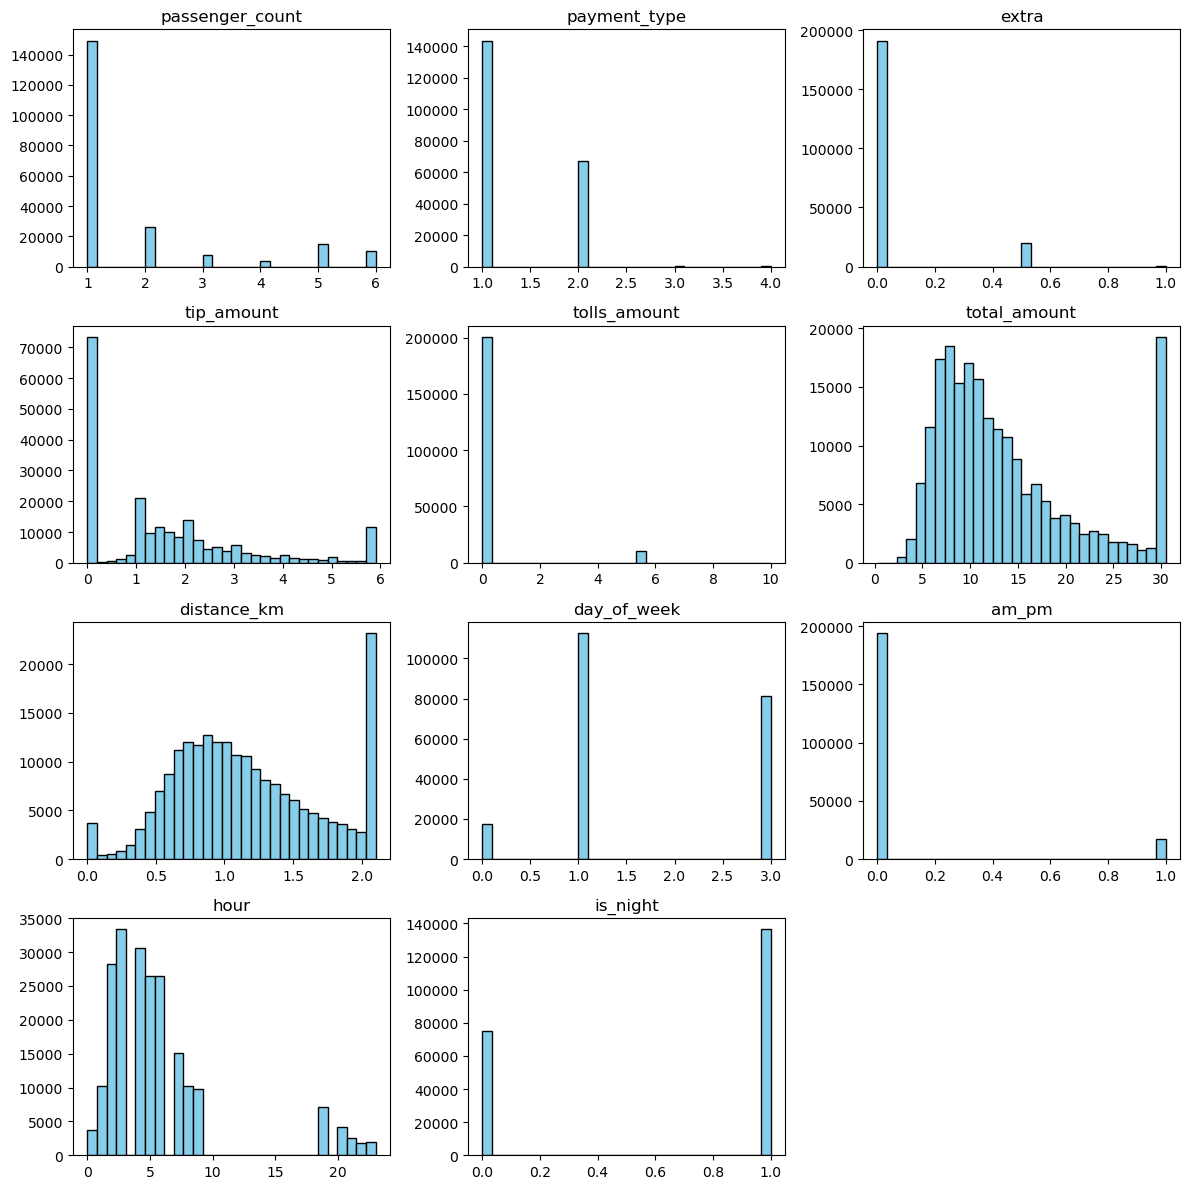

In [106]:
skewness = df_1.skew()

# Select numerical columns with high skewness (absolute skewness > 0.5)
skewed_cols = skewness.index

# Plot histograms before transformation
plt.figure(figsize=(12,12))
for i, col in enumerate(skewed_cols, 1):
    plt.subplot(4,3,i)
    plt.hist(df_1[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f"{col}")
plt.tight_layout()
plt.show()

### <span style="color:#fc9803;">**Cleaned Data**</span>

In [108]:
df_1.columns

Index(['passenger_count', 'payment_type', 'extra', 'tip_amount',
       'tolls_amount', 'total_amount', 'distance_km', 'day_of_week', 'am_pm',
       'hour', 'is_night'],
      dtype='object')

In [109]:
# For reset index
df_1 = df_1.reset_index(drop=True)

In [110]:
df_1.to_csv('data_cleaned.csv',index=False)

In [111]:
data = pd.read_csv('data_cleaned.csv')

# <span style="color:#c934eb;">**Model Building**</span>

In [113]:
X = data.drop('total_amount',axis=1)
y = data['total_amount']

## <span style="color:#fc9803;">**Train Test Data Split**</span>
### <span style="color:#0eb514;">**Training data 70% and Test data 30%**</span>

In [115]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [116]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBoost Regressor": XGBRegressor()
}
# Train and evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test data

    # Compute evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2 Score": r2
    }

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
results_df

,MAE,MSE,RMSE,R2 Score
Linear Regression,2.129872,10.143847,3.184941,0.816128
Decision Tree Regressor,1.337434,7.207440,2.684668,0.869355
Random Forest Regressor,1.186224,5.286388,2.299215,0.904176
XGBoost Regressor,1.240986,4.681703,2.163724,0.915137


### <span style="color:#0eb514;">**Training data 75% and Test data 25%**</span>

In [118]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [119]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBoost Regressor": XGBRegressor()
}
# Train and evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test data

    # Compute evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2 Score": r2
    }

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
results_df

,MAE,MSE,RMSE,R2 Score
Linear Regression,2.130232,10.194563,3.192893,0.814661
Decision Tree Regressor,1.338030,7.255766,2.693653,0.868089
Random Forest Regressor,1.187084,5.311198,2.304604,0.903441
XGBoost Regressor,1.242851,4.729409,2.174721,0.914019


### <span style="color:#0eb514;">**Training data 80% and Test data 20%**</span>

In [121]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [122]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBoost Regressor": XGBRegressor()
}
# Train and evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test data

    # Compute evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2 Score": r2
    }

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
results_df

,MAE,MSE,RMSE,R2 Score
Linear Regression,2.133626,10.275596,3.205557,0.812972
Decision Tree Regressor,1.322376,7.042037,2.653684,0.871827
Random Forest Regressor,1.181790,5.285248,2.298967,0.903802
XGBoost Regressor,1.244062,4.724474,2.173586,0.914009


## <span style="color:#c934eb;">**Hyperparameter Tuning (using RandomizedSearchCV)**</span>

In [124]:
# Define the model
xgb = XGBRegressor(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Perform Randomized Search
random_search = RandomizedSearchCV(estimator=xgb,
                                   param_distributions=param_grid,
                                   n_iter=20,
                                   scoring='r2',
                                   cv=5,
                                   verbose=1,
                                   n_jobs=-1)

random_search.fit(X_train, y_train)

# Best estimator
best_xgb = random_search.best_estimator_
print("Best Hyperparameters:\n", random_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters:
 {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.05, 'colsample_bytree': 0.6}


## <span style="color:#c934eb;">**Cross-Validation (Using the Best Model)**</span>

In [126]:
# Cross-validate R² score
cv_scores = cross_val_score(best_xgb, X, y, cv=5, scoring='r2')
print("Cross-Validated R2 Scores:", cv_scores)
print("Average R2 Score:", np.mean(cv_scores))

Cross-Validated R2 Scores: [0.92097319 0.91172502 0.91366691 0.90904591 0.90597447]
Average R2 Score: 0.912277102124601


## <span style="color:#c934eb;">**Feature Importance Visualization**</span>

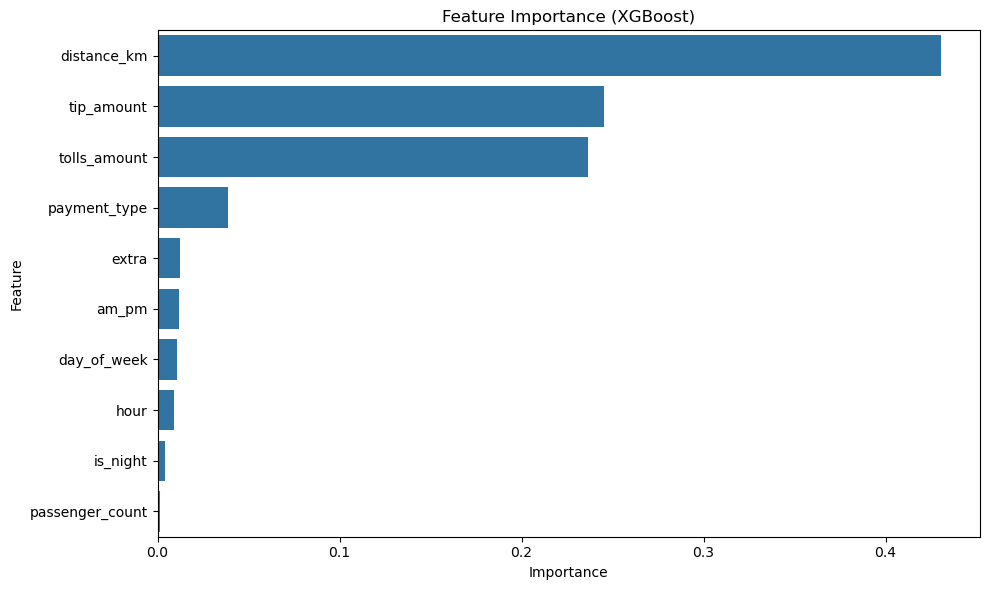

In [128]:
# Fit best model
best_xgb.fit(X_train, y_train)

# Get feature importance
importances = best_xgb.feature_importances_
features = X.columns

# Create DataFrame for plotting
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance (XGBoost)')
plt.tight_layout()
plt.show()

In [129]:
X_train.sample(1)

,passenger_count,payment_type,extra,tip_amount,tolls_amount,distance_km,day_of_week,am_pm,hour,is_night
141986,1,1,0.0,1.0,0.0,0.916291,1,0,3,1


## <span style="color:#c934eb;">**Predicting system**</span>

In [131]:
my_df = {
    "passenger_count": [int(input())],
    "payment_type": [int(input())],
    "extra": [float(input())],
    "tip_amount": [float(input())],
    "tolls_amount": [float(input())],
    "distance_km": [float(input())],
    "day_of_week": [int(input())],
    "am_pm": [int(input())],
    "hour": [int(input())],
    "is_night": [int(input())]
}

input_data = pd.DataFrame(my_df)

 1
 2
 0
 0
 5.54
 8.52
 3
 0
 6
 0


In [132]:
input_data

,passenger_count,payment_type,extra,tip_amount,tolls_amount,distance_km,day_of_week,am_pm,hour,is_night
0,1,2,0.0,0.0,5.54,8.52,3,0,6,0


In [133]:
input_data['distance_km'] = np.log1p(input_data['distance_km'])

In [134]:
input_data

,passenger_count,payment_type,extra,tip_amount,tolls_amount,distance_km,day_of_week,am_pm,hour,is_night
0,1,2,0.0,0.0,5.54,2.253395,3,0,6,0


In [135]:
pred = best_xgb.predict(input_data)
pred[0]

30.574492

### <span style="color:#fc9803;">**Serializing the Trained Models**</span>

In [137]:
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_xgb, f)